In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%pip install mlxtend pandas
from mlxtend.frequent_patterns import apriori, association_rules

# Preprocessing data

In [ ]:
data = pd.read_csv('/content/Assignment-1_Data.csv', on_bad_lines='warn', delimiter=';')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-2-f46809c6124a>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/Assignment-1_Data.csv', on_bad_lines='warn', delimiter=';')


In [ ]:
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom


In [ ]:
# Display basic information about the dataset
print("Number of rows and columns:", data.shape)
print("\nData Types and Missing Values:")
print(data.info())


Number of rows and columns: (522064, 7)

Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BillNo      522064 non-null  object 
 1   Itemname    520609 non-null  object 
 2   Quantity    522064 non-null  int64  
 3   Date        522064 non-null  object 
 4   Price       522064 non-null  object 
 5   CustomerID  388023 non-null  float64
 6   Country     522064 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 27.9+ MB
None


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Check Missing Values
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    134041
Country            0
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# drop duplicate
data.drop_duplicates(inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(data.columns)


Index(['BillNo', 'Itemname', 'Quantity', 'Date', 'Price', 'CustomerID',
       'Country'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Convert 'Date' data type
data['Date'] = pd.to_datetime(data['Date'], format='%d.%m.%Y %H:%M', dayfirst=True)

# Add 'year', 'month', and 'day' columns
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data['day_name'] = data['Date'].dt.day_name()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,year,month,day,day_name
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,"2,55",17850.0,United Kingdom,2010,12,1,Wednesday
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,"3,39",17850.0,United Kingdom,2010,12,1,Wednesday
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,"2,75",17850.0,United Kingdom,2010,12,1,Wednesday
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,"3,39",17850.0,United Kingdom,2010,12,1,Wednesday
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,"3,39",17850.0,United Kingdom,2010,12,1,Wednesday


In [ ]:
# تحويل جميع القيم في عمود Itemname إلى lowercase
data['Itemname'] = data['Itemname'].str.lower()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


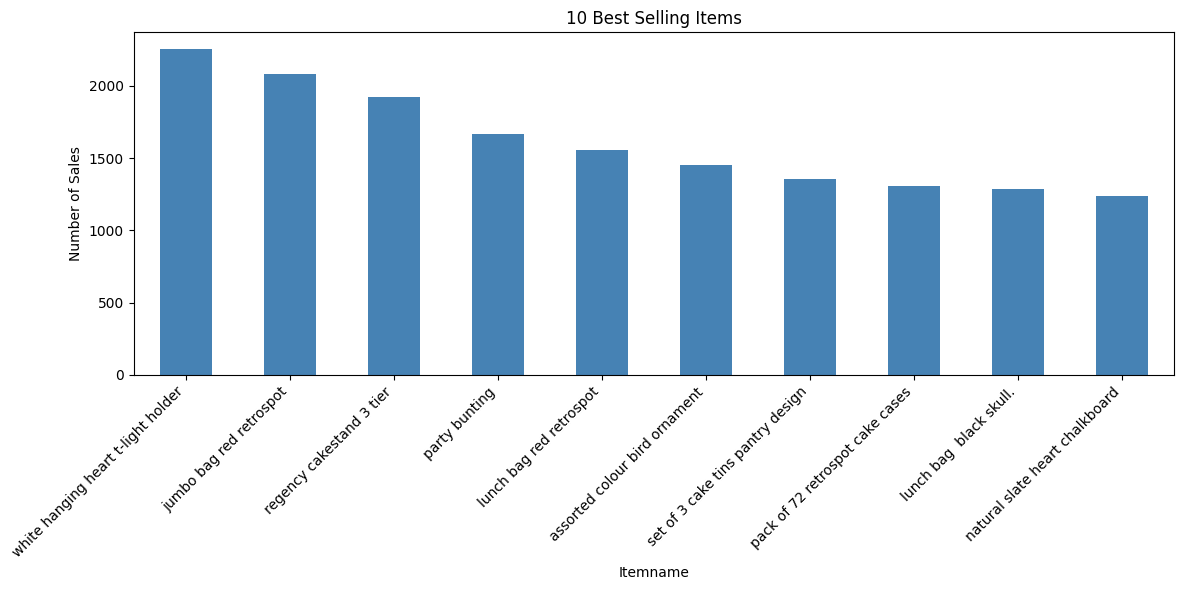

In [ ]:

import matplotlib.pyplot as plt

# افترض أنك قد قمت بقراءة البيانات بالفعل
# data = pd.read_csv('your_data.csv')

# حساب عدد المبيعات لكل عنصر
item_counts = data['Itemname'].value_counts().head(10)

# إعادة ترتيب البيانات (إذا لزم الأمر)
item_counts = item_counts.sort_values(ascending=False)

# رسم البيانات
plt.figure(figsize=(12, 6))
item_counts.plot(kind='bar', color='steelblue')

# إضافة العناوين
plt.title('10 Best Selling Items')
plt.xlabel('Itemname')
plt.ylabel('Number of Sales')

# تدوير تسميات المحور x
plt.xticks(rotation=45, ha='right')

# عرض الرسم
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


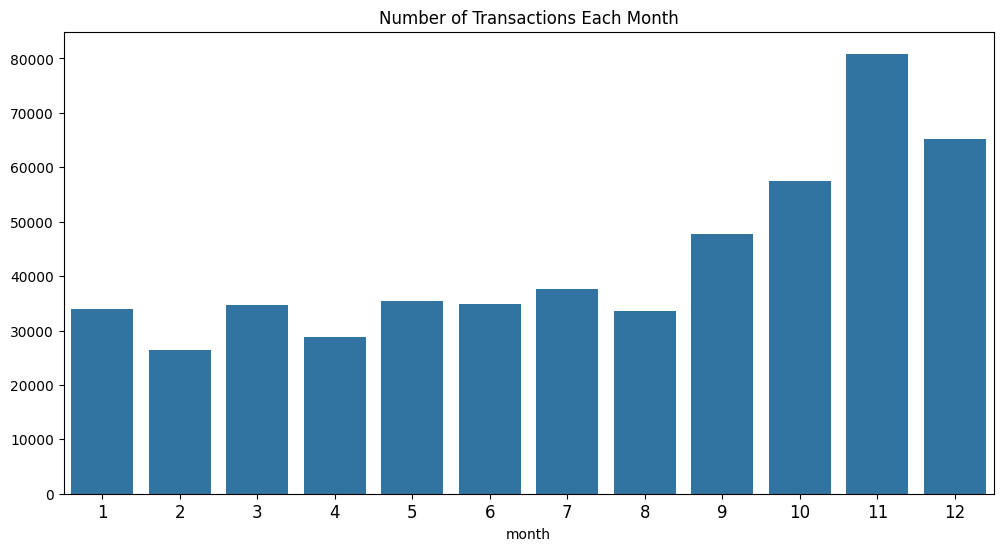

In [ ]:
# Number of transactions each month
plt.figure(figsize=(12,6))

sns.barplot(x = data['month'].value_counts().index,
           y = data['month'].value_counts().values)
plt.xticks(size=12)
plt.title('Number of Transactions Each Month')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


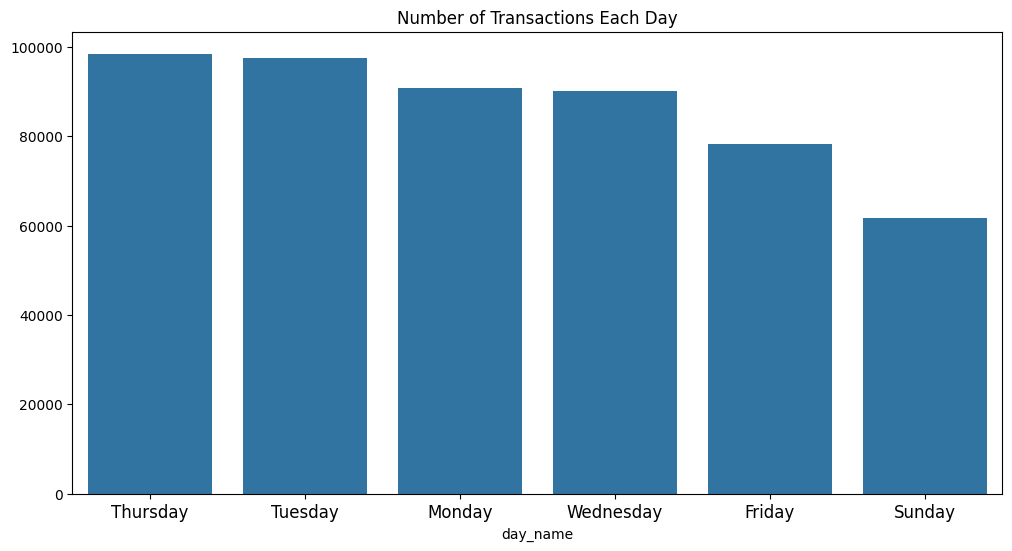

In [ ]:
# Number of transactions each day
plt.figure(figsize=(12,6))

sns.barplot(x = data['day_name'].value_counts().index,
           y = data['day_name'].value_counts().values)
plt.xticks(size=12)
plt.title('Number of Transactions Each Day')
plt.show()

According to our research, the White Hanging Heart T-Light Holder is the top-selling product.

Most months have average sales, but December is the highest and February is the lowest.

The difference in the number of sales each day is very slight, the highest sales are on Thursday, and the lowest are on sunday.

# Data Preparation

In [ ]:
item_count = data.groupby(['CustomerID', 'Date', 'Itemname'])['Itemname'].count().reset_index(name='Count')
item_count.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CustomerID,Date,Itemname,Count
0,12346.0,2011-01-18 10:01:00,medium ceramic top storage jar,1
1,12347.0,2010-12-07 14:57:00,3d dog picture playing cards,1
2,12347.0,2010-12-07 14:57:00,airline bag vintage jet set brown,1
3,12347.0,2010-12-07 14:57:00,alarm clock bakelike chocolate,1
4,12347.0,2010-12-07 14:57:00,alarm clock bakelike green,1
5,12347.0,2010-12-07 14:57:00,alarm clock bakelike orange,1
6,12347.0,2010-12-07 14:57:00,alarm clock bakelike pink,1
7,12347.0,2010-12-07 14:57:00,alarm clock bakelike red,1
8,12347.0,2010-12-07 14:57:00,bathroom metal sign,1
9,12347.0,2010-12-07 14:57:00,black candelabra t-light holder,1


In [ ]:
item_count['Transaction'] = item_count.groupby(['CustomerID', 'Date'])['Date'].ngroup()+1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
item_count.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CustomerID,Date,Itemname,Count,Transaction
0,12346.0,2011-01-18 10:01:00,medium ceramic top storage jar,1,1
1,12347.0,2010-12-07 14:57:00,3d dog picture playing cards,1,2
2,12347.0,2010-12-07 14:57:00,airline bag vintage jet set brown,1,2
3,12347.0,2010-12-07 14:57:00,alarm clock bakelike chocolate,1,2
4,12347.0,2010-12-07 14:57:00,alarm clock bakelike green,1,2


In [ ]:
# إنشاء جدول محوري
basket =item_count.pivot_table(index='CustomerID', columns='Itemname', values='Count', aggfunc='sum', fill_value=0)

# تحويل القيم إلى 0 أو 1
basket = (basket > 0).astype(int)

# عرض الجدول
basket.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Itemname,10 colour spaceboy pen,12 coloured party balloons,12 daisy pegs in wood box,12 egg house painted wood,12 hanging eggs hand painted,12 ivory rose peg place settings,12 message cards with envelopes,12 pencil small tube woodland,12 pencils small tube red retrospot,12 pencils small tube skull,...,zinc star t-light holder,zinc sweetheart soap dish,zinc sweetheart wire letter rack,zinc t-light holder star large,zinc t-light holder stars large,zinc t-light holder stars small,zinc top 2 door wooden shelf,zinc willie winkie candle stick,zinc wire kitchen organiser,zinc wire sweetheart letter tray
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12352.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Apriori Modelling

In [ ]:
from mlxtend.frequent_patterns import association_rules, apriori


# الآن طبق خوارزمية Apriori
frequent_itemsets = apriori(basket, min_support=0.05, use_colnames=True)
frequent_itemsets.sort_values('support', ascending=False).head(10)
# استخراج القواعد الارتباطية
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

# عرض القواعد
print(rules)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


                                          antecedents  \
0                       (60 teatime fairy cake cases)   
1                          (alarm clock bakelike red)   
2                        (alarm clock bakelike green)   
3                         (alarm clock bakelike pink)   
4                        (baking set spaceboy design)   
..                                                ...   
91  (pink regency teacup and saucer, roses regency...   
92  (green regency teacup and saucer, regency cake...   
93  (green regency teacup and saucer, roses regenc...   
94  (regency cakestand 3 tier, roses regency teacu...   
95                   (pink regency teacup and saucer)   

                                          consequents  antecedent support  \
0                   (pack of 72 retrospot cake cases)            0.094950   
1                        (alarm clock bakelike green)            0.088434   
2                          (alarm clock bakelike red)            0.074238   
3      

In [ ]:
rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(60 teatime fairy cake cases),(pack of 72 retrospot cake cases),0.094950,0.145916,0.061671,0.649510,4.451266,0.047816,2.436828,0.856687
1,(alarm clock bakelike red),(alarm clock bakelike green),0.088434,0.074238,0.060740,0.686842,9.251914,0.054175,2.956215,0.978442
2,(alarm clock bakelike green),(alarm clock bakelike red),0.074238,0.088434,0.060740,0.818182,9.251914,0.054175,5.013614,0.963438
3,(alarm clock bakelike pink),(alarm clock bakelike red),0.066093,0.088434,0.051199,0.774648,8.759637,0.045354,4.045075,0.948531
4,(baking set spaceboy design),(baking set 9 piece retrospot),0.067954,0.133582,0.055853,0.821918,6.152928,0.046775,4.865273,0.898535
